In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from census import Census
from pprint import pprint
from scipy.stats import linregress
import gmaps

# Google API Key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)


# Denver

In [2]:
target_coordinates = "39.7621, -104.8759"
# target_search = "mexican"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {   
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status  
} 
# establish dataframe
denver_dataframe = pd.DataFrame(review_dict)
denver_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,Rocky Mountain Sudanese's restaurant,4.9,0,86,39.739778,-104.869816,"10180 E Colfax Ave, Aurora",CLOSED_TEMPORARILY
1,FIFTY300 Restaurant,3.8,0,21,39.770339,-104.903993,"3801 Quebec St, Denver",OPERATIONAL
2,Ted'z Place Restaurant and Lounge,4.5,2,814,39.791361,-104.926156,"5271 E 52nd Ave, Commerce City",OPERATIONAL
3,Sapp Bros Cafe,4.0,2,496,39.784892,-104.904588,"7120 E 49th Ave, Commerce City",OPERATIONAL
4,Café Mercato,4.4,2,372,39.719425,-104.896602,"7561 E Academy Blvd, Denver",OPERATIONAL
5,El Muelle Mexican Restaurant,3.8,0,119,39.723649,-104.820766,"475 Sable Blvd, Aurora",OPERATIONAL
6,Phở 888,4.5,1,1221,39.724174,-104.821340,"Parking lot, 539 Sable Blvd, Aurora",OPERATIONAL
7,La Sandia,4.0,2,961,39.782148,-104.891528,"8340 Northfield Blvd Unit 1690, Denver",OPERATIONAL
8,Restaurante El Tamarindo,4.1,0,286,39.739806,-104.898394,"7700 E Colfax Ave, Denver",OPERATIONAL
9,El Chalate Restaurant,4.2,1,975,39.740360,-104.893437,"8119 E Colfax Ave, Denver",OPERATIONAL


In [3]:
denver_dataframe['City']='Denver'
denver_dataframe

,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status,City
0,Rocky Mountain Sudanese's restaurant,4.9,0,86,39.739778,-104.869816,"10180 E Colfax Ave, Aurora",CLOSED_TEMPORARILY,Denver
1,FIFTY300 Restaurant,3.8,0,21,39.770339,-104.903993,"3801 Quebec St, Denver",OPERATIONAL,Denver
2,Ted'z Place Restaurant and Lounge,4.5,2,814,39.791361,-104.926156,"5271 E 52nd Ave, Commerce City",OPERATIONAL,Denver
3,Sapp Bros Cafe,4.0,2,496,39.784892,-104.904588,"7120 E 49th Ave, Commerce City",OPERATIONAL,Denver
4,Café Mercato,4.4,2,372,39.719425,-104.896602,"7561 E Academy Blvd, Denver",OPERATIONAL,Denver
5,El Muelle Mexican Restaurant,3.8,0,119,39.723649,-104.820766,"475 Sable Blvd, Aurora",OPERATIONAL,Denver
6,Phở 888,4.5,1,1221,39.724174,-104.821340,"Parking lot, 539 Sable Blvd, Aurora",OPERATIONAL,Denver
7,La Sandia,4.0,2,961,39.782148,-104.891528,"8340 Northfield Blvd Unit 1690, Denver",OPERATIONAL,Denver
8,Restaurante El Tamarindo,4.1,0,286,39.739806,-104.898394,"7700 E Colfax Ave, Denver",OPERATIONAL,Denver
9,El Chalate Restaurant,4.2,1,975,39.740360,-104.893437,"8119 E Colfax Ave, Denver",OPERATIONAL,Denver


# Chicago

In [4]:
target_coordinates = "41.8373, -87.6862"
# target_search = "mexican"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        
#         if places_data["results"][r]["rating"]>= 4.0:
#             rating.append(places_data["results"][r]["rating"])
        
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {   
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status  
} 
# establish dataframe
chicago_dataframe = pd.DataFrame(review_dict)
chicago_dataframe

Restaurant has no price level. Skipping...


,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,Red Barrel Restaurant,4.4,2,586,41.800116,-87.735133,"5214 S Archer Ave, Chicago",OPERATIONAL
1,Bridgeport Restaurant,4.2,1,768,41.830638,-87.646313,"3500 S Halsted St, Chicago",OPERATIONAL
2,The Village,4.5,2,3484,41.880538,-87.630205,"71 W Monroe St, Chicago",OPERATIONAL
3,Palace Grill Restaurant,4.6,1,786,41.881654,-87.662523,"1408 W Madison St, Chicago",OPERATIONAL
4,Harvey's Family Restaurant,4.4,1,246,41.837725,-87.643382,"657 W 31st St, Chicago",OPERATIONAL
5,Rivers Restaurant,4.2,2,432,41.880834,-87.637123,"30 S Wacker Dr, Chicago",OPERATIONAL
6,Manjares Restaurant,4.3,2,772,41.851318,-87.666411,"2230 S Ashland Ave, Chicago",OPERATIONAL
7,Parkview Restaurant Grill,4.6,1,239,41.855939,-87.676113,"2000 W 19th St, Chicago",OPERATIONAL
8,Los Langostinos Restaurant,4.5,2,287,41.837019,-87.722989,"3059 S Harding Ave, Chicago",OPERATIONAL
9,Eppel's Restaurant,4.5,1,1009,41.867400,-87.641464,"554 Roosevelt Rd, Chicago",OPERATIONAL


In [5]:
chicago_dataframe['City']='Chicago'
chicago_dataframe

,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status,City
0,Red Barrel Restaurant,4.4,2,586,41.800116,-87.735133,"5214 S Archer Ave, Chicago",OPERATIONAL,Chicago
1,Bridgeport Restaurant,4.2,1,768,41.830638,-87.646313,"3500 S Halsted St, Chicago",OPERATIONAL,Chicago
2,The Village,4.5,2,3484,41.880538,-87.630205,"71 W Monroe St, Chicago",OPERATIONAL,Chicago
3,Palace Grill Restaurant,4.6,1,786,41.881654,-87.662523,"1408 W Madison St, Chicago",OPERATIONAL,Chicago
4,Harvey's Family Restaurant,4.4,1,246,41.837725,-87.643382,"657 W 31st St, Chicago",OPERATIONAL,Chicago
5,Rivers Restaurant,4.2,2,432,41.880834,-87.637123,"30 S Wacker Dr, Chicago",OPERATIONAL,Chicago
6,Manjares Restaurant,4.3,2,772,41.851318,-87.666411,"2230 S Ashland Ave, Chicago",OPERATIONAL,Chicago
7,Parkview Restaurant Grill,4.6,1,239,41.855939,-87.676113,"2000 W 19th St, Chicago",OPERATIONAL,Chicago
8,Los Langostinos Restaurant,4.5,2,287,41.837019,-87.722989,"3059 S Harding Ave, Chicago",OPERATIONAL,Chicago
9,Eppel's Restaurant,4.5,1,1009,41.867400,-87.641464,"554 Roosevelt Rd, Chicago",OPERATIONAL,Chicago


# New Orleans

In [6]:
target_coordinates = "30.0687, -89.9288"
# target_search = "mexican"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status
} 
# establish dataframe
new_orleans_dataframe = pd.DataFrame(review_dict)
new_orleans_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,Madchef at 59th,4.4,0,212,30.040669,-89.955001,"5941 Bullard Ave #7, New Orleans",OPERATIONAL
1,Bullard Seafood and Grill,4.3,1,1160,30.048131,-89.962155,"7025 Bullard Ave, New Orleans",OPERATIONAL
2,Vucinovich's,4.7,1,264,30.030055,-89.927879,"4510 Michoud Blvd, New Orleans",OPERATIONAL
3,Burritos Grill Mexican Fresh Cuisine,4.4,0,332,30.038769,-89.976998,"7009 Read Blvd, New Orleans",OPERATIONAL
4,Tempo Creole Cuisine,5.0,2,9,30.040188,-89.955104,"5931 Bullard Ave #7, New Orleans",OPERATIONAL
5,Perkins Landing,0.0,0,0,30.057435,-89.968539,"11960 Hayne Blvd, New Orleans",OPERATIONAL
6,Easy Seafood,4.5,1,187,30.032175,-89.928555,"Ye Ole Village Shopping Center, 13243 Chef Men...",OPERATIONAL
7,Tony's Super Cajun Seafood,4.1,1,367,30.041712,-89.956840,"5971 Bullard Ave, New Orleans",OPERATIONAL
8,East Seafood LLC,4.5,0,37,30.047865,-89.963140,"7030 Bullard Ave Suite D, New Orleans",OPERATIONAL
9,Julie's Kitchen,4.5,1,194,30.030417,-89.970846,"5609 Read Blvd, New Orleans",OPERATIONAL


In [7]:
new_orleans_dataframe['City']='New Orleans'
new_orleans_dataframe

,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status,City
0,Madchef at 59th,4.4,0,212,30.040669,-89.955001,"5941 Bullard Ave #7, New Orleans",OPERATIONAL,New Orleans
1,Bullard Seafood and Grill,4.3,1,1160,30.048131,-89.962155,"7025 Bullard Ave, New Orleans",OPERATIONAL,New Orleans
2,Vucinovich's,4.7,1,264,30.030055,-89.927879,"4510 Michoud Blvd, New Orleans",OPERATIONAL,New Orleans
3,Burritos Grill Mexican Fresh Cuisine,4.4,0,332,30.038769,-89.976998,"7009 Read Blvd, New Orleans",OPERATIONAL,New Orleans
4,Tempo Creole Cuisine,5.0,2,9,30.040188,-89.955104,"5931 Bullard Ave #7, New Orleans",OPERATIONAL,New Orleans
5,Perkins Landing,0.0,0,0,30.057435,-89.968539,"11960 Hayne Blvd, New Orleans",OPERATIONAL,New Orleans
6,Easy Seafood,4.5,1,187,30.032175,-89.928555,"Ye Ole Village Shopping Center, 13243 Chef Men...",OPERATIONAL,New Orleans
7,Tony's Super Cajun Seafood,4.1,1,367,30.041712,-89.956840,"5971 Bullard Ave, New Orleans",OPERATIONAL,New Orleans
8,East Seafood LLC,4.5,0,37,30.047865,-89.963140,"7030 Bullard Ave Suite D, New Orleans",OPERATIONAL,New Orleans
9,Julie's Kitchen,4.5,1,194,30.030417,-89.970846,"5609 Read Blvd, New Orleans",OPERATIONAL,New Orleans


# Jacksonville

In [8]:
target_coordinates = "30.3322, -81.6749"
# target_search = "mexican"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status  
} 
# establish dataframe
jacksonville_dataframe = pd.DataFrame(review_dict)
jacksonville_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,BB's Restaurant and Bar,4.6,3,1396,30.315806,-81.654604,"1019 Hendricks Ave, Jacksonville",OPERATIONAL
1,Brick Restaurant,4.4,2,1285,30.296726,-81.704119,"3585 St Johns Ave, Jacksonville",OPERATIONAL
2,Taverna,4.5,2,1240,30.303940,-81.654706,"1986 San Marco Blvd, Jacksonville",OPERATIONAL
3,Restaurant Orsay,4.7,3,1619,30.300344,-81.710069,"3630 Park St, Jacksonville",OPERATIONAL
4,Bellwether,4.6,2,541,30.327572,-81.659938,"117 W Forsyth St, Jacksonville",OPERATIONAL
5,Primi Piatti,4.6,0,284,30.310058,-81.694199,"2722 Park St, Jacksonville",OPERATIONAL
6,The Cookbook Restaurant,4.4,0,441,30.346681,-81.658422,"1827 N Pearl St, Jacksonville",OPERATIONAL
7,Fox Restaurant,4.6,1,936,30.296639,-81.703752,"3580 St Johns Ave, Jacksonville",OPERATIONAL
8,Biscottis,4.7,2,1104,30.297039,-81.703290,"3556 St Johns Ave, Jacksonville",OPERATIONAL
9,Matthew's Restaurant,4.7,4,455,30.303936,-81.652263,"2107 Hendricks Ave, Jacksonville",OPERATIONAL


In [9]:
jacksonville_dataframe['City']='Jacksonville'
jacksonville_dataframe

,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status,City
0,BB's Restaurant and Bar,4.6,3,1396,30.315806,-81.654604,"1019 Hendricks Ave, Jacksonville",OPERATIONAL,Jacksonville
1,Brick Restaurant,4.4,2,1285,30.296726,-81.704119,"3585 St Johns Ave, Jacksonville",OPERATIONAL,Jacksonville
2,Taverna,4.5,2,1240,30.303940,-81.654706,"1986 San Marco Blvd, Jacksonville",OPERATIONAL,Jacksonville
3,Restaurant Orsay,4.7,3,1619,30.300344,-81.710069,"3630 Park St, Jacksonville",OPERATIONAL,Jacksonville
4,Bellwether,4.6,2,541,30.327572,-81.659938,"117 W Forsyth St, Jacksonville",OPERATIONAL,Jacksonville
5,Primi Piatti,4.6,0,284,30.310058,-81.694199,"2722 Park St, Jacksonville",OPERATIONAL,Jacksonville
6,The Cookbook Restaurant,4.4,0,441,30.346681,-81.658422,"1827 N Pearl St, Jacksonville",OPERATIONAL,Jacksonville
7,Fox Restaurant,4.6,1,936,30.296639,-81.703752,"3580 St Johns Ave, Jacksonville",OPERATIONAL,Jacksonville
8,Biscottis,4.7,2,1104,30.297039,-81.703290,"3556 St Johns Ave, Jacksonville",OPERATIONAL,Jacksonville
9,Matthew's Restaurant,4.7,4,455,30.303936,-81.652263,"2107 Hendricks Ave, Jacksonville",OPERATIONAL,Jacksonville


# Memphis

In [10]:
target_coordinates = "35.1046, -89.9773"
# target_search = "mexican"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status
} 
# establish dataframe
memphis_dataframe = pd.DataFrame(review_dict)
memphis_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,Barksdale Restaurant,4.5,1,576,35.132119,-89.990591,"237 Cooper St, Memphis",OPERATIONAL
1,Cafe Society,4.4,3,214,35.143675,-90.003202,"212 N Evergreen St #5210, Memphis",OPERATIONAL
2,Soul Fish Cafe,4.6,2,2730,35.122264,-89.990719,"862 Cooper St, Memphis",OPERATIONAL
3,Char Restaurant,4.5,3,1558,35.119552,-89.946040,"431 S Highland St #120, Memphis",OPERATIONAL
4,Casablanca Restaurant,4.4,2,804,35.137927,-90.004344,"1707 Madison Ave, Memphis",OPERATIONAL
5,Sweet Grass,4.5,2,232,35.120023,-89.991244,"937 Cooper St, Memphis",CLOSED_TEMPORARILY
6,Cafe Ole,4.0,2,896,35.119536,-89.991212,"959 Cooper St, Memphis",OPERATIONAL
7,Cupboard,4.3,1,2281,35.136934,-90.015023,"1400 Union Ave, Memphis",OPERATIONAL
8,Tsunami,4.7,3,162,35.120412,-89.990820,"928 Cooper St, Memphis",OPERATIONAL
9,Castle Restaurant,4.6,0,200,35.107792,-89.929488,"3992 Park Ave, Memphis",OPERATIONAL


In [11]:
memphis_dataframe['City']='Memphis'
memphis_dataframe

,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status,City
0,Barksdale Restaurant,4.5,1,576,35.132119,-89.990591,"237 Cooper St, Memphis",OPERATIONAL,Memphis
1,Cafe Society,4.4,3,214,35.143675,-90.003202,"212 N Evergreen St #5210, Memphis",OPERATIONAL,Memphis
2,Soul Fish Cafe,4.6,2,2730,35.122264,-89.990719,"862 Cooper St, Memphis",OPERATIONAL,Memphis
3,Char Restaurant,4.5,3,1558,35.119552,-89.946040,"431 S Highland St #120, Memphis",OPERATIONAL,Memphis
4,Casablanca Restaurant,4.4,2,804,35.137927,-90.004344,"1707 Madison Ave, Memphis",OPERATIONAL,Memphis
5,Sweet Grass,4.5,2,232,35.120023,-89.991244,"937 Cooper St, Memphis",CLOSED_TEMPORARILY,Memphis
6,Cafe Ole,4.0,2,896,35.119536,-89.991212,"959 Cooper St, Memphis",OPERATIONAL,Memphis
7,Cupboard,4.3,1,2281,35.136934,-90.015023,"1400 Union Ave, Memphis",OPERATIONAL,Memphis
8,Tsunami,4.7,3,162,35.120412,-89.990820,"928 Cooper St, Memphis",OPERATIONAL,Memphis
9,Castle Restaurant,4.6,0,200,35.107792,-89.929488,"3992 Park Ave, Memphis",OPERATIONAL,Memphis


# Raleigh

In [12]:
target_coordinates = "35.8325, -78.6435"
# target_search = "mexican"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status
} 
# establish dataframe
raleigh_dataframe = pd.DataFrame(review_dict)
raleigh_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,Jolie Restaurant,4.6,0,194,35.788859,-78.634177,"620 N Person St, Raleigh",OPERATIONAL
1,Crawford and Son,4.7,3,527,35.788800,-78.634221,"618 N Person St, Raleigh",OPERATIONAL
2,Vic's Italian Restaurant & Pizzeria,4.4,2,736,35.815293,-78.697240,"4035 Lake Boone Trail STE 109, Raleigh",OPERATIONAL
3,Cafe Tiramisu,4.7,2,201,35.865149,-78.619044,"6008 Falls of Neuse Rd, Raleigh",OPERATIONAL
4,Braise Contemporary Southern,4.6,0,36,35.842780,-78.678237,"4500 Marriott Dr, Raleigh",OPERATIONAL
5,Cantina 18,4.3,2,622,35.789912,-78.661678,"433 Daniels St, Raleigh",OPERATIONAL
6,Salt & Lime Cabo Grill,4.5,2,1735,35.865139,-78.619065,"6006 Falls of Neuse Rd, Raleigh",OPERATIONAL
7,The Melting Pot,4.3,3,908,35.824283,-78.621391,"3100 Wake Forest Rd, Raleigh",OPERATIONAL
8,Bloomsbury Bistro,4.6,3,283,35.804037,-78.644615,"509-101 W Whitaker Mill Rd, Raleigh",OPERATIONAL
9,J. Alexander's Restaurant,4.5,3,2071,35.840579,-78.684468,"4600 Crabtree Valley Ave, Raleigh",OPERATIONAL


In [13]:
raleigh_dataframe['City']='Raleigh'
raleigh_dataframe

,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status,City
0,Jolie Restaurant,4.6,0,194,35.788859,-78.634177,"620 N Person St, Raleigh",OPERATIONAL,Raleigh
1,Crawford and Son,4.7,3,527,35.788800,-78.634221,"618 N Person St, Raleigh",OPERATIONAL,Raleigh
2,Vic's Italian Restaurant & Pizzeria,4.4,2,736,35.815293,-78.697240,"4035 Lake Boone Trail STE 109, Raleigh",OPERATIONAL,Raleigh
3,Cafe Tiramisu,4.7,2,201,35.865149,-78.619044,"6008 Falls of Neuse Rd, Raleigh",OPERATIONAL,Raleigh
4,Braise Contemporary Southern,4.6,0,36,35.842780,-78.678237,"4500 Marriott Dr, Raleigh",OPERATIONAL,Raleigh
5,Cantina 18,4.3,2,622,35.789912,-78.661678,"433 Daniels St, Raleigh",OPERATIONAL,Raleigh
6,Salt & Lime Cabo Grill,4.5,2,1735,35.865139,-78.619065,"6006 Falls of Neuse Rd, Raleigh",OPERATIONAL,Raleigh
7,The Melting Pot,4.3,3,908,35.824283,-78.621391,"3100 Wake Forest Rd, Raleigh",OPERATIONAL,Raleigh
8,Bloomsbury Bistro,4.6,3,283,35.804037,-78.644615,"509-101 W Whitaker Mill Rd, Raleigh",OPERATIONAL,Raleigh
9,J. Alexander's Restaurant,4.5,3,2071,35.840579,-78.684468,"4600 Crabtree Valley Ave, Raleigh",OPERATIONAL,Raleigh


# Baltimore

In [14]:
target_coordinates = "39.3051, -76.6144"
# target_search = "mexican"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status
} 
# establish dataframe
baltimore_dataframe = pd.DataFrame(review_dict)
baltimore_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,Cypriana,4.4,2,477,39.335997,-76.621485,"105 W 39th St, Baltimore",OPERATIONAL
1,The Helmand,4.6,2,797,39.299035,-76.615895,"806 N Charles St, Baltimore",OPERATIONAL
2,Telltale Restaurant,4.0,0,40,39.288563,-76.614930,Baltimore,CLOSED_TEMPORARILY
3,La Calle Restaurant,4.7,2,317,39.289168,-76.611170,"10 South St, Baltimore",OPERATIONAL
4,Tagliata,4.5,3,942,39.284538,-76.599697,"1012 Fleet St, Baltimore",OPERATIONAL
5,Peppa Flame Restaurant and Lounge,4.2,2,228,39.270614,-76.594217,"1401 E Clement St, Baltimore",OPERATIONAL
6,Mi Comalito Restaurant and Bar 2101 North Char...,4.4,1,345,39.313366,-76.616349,"2101 N Charles St, Baltimore",OPERATIONAL
7,Cafe Gia Ristorante,4.5,2,470,39.285362,-76.601341,"410 S High St, Baltimore",OPERATIONAL
8,Chef BobbyD Restaurant and Catering,4.5,2,393,39.337440,-76.637526,"4032 Falls Rd, Baltimore",OPERATIONAL
9,"Magdalena, A Maryland Bistro",4.7,4,193,39.303453,-76.612797,"205 E Biddle St, Baltimore",OPERATIONAL


In [15]:
baltimore_dataframe['City']='Baltimore'
baltimore_dataframe

,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status,City
0,Cypriana,4.4,2,477,39.335997,-76.621485,"105 W 39th St, Baltimore",OPERATIONAL,Baltimore
1,The Helmand,4.6,2,797,39.299035,-76.615895,"806 N Charles St, Baltimore",OPERATIONAL,Baltimore
2,Telltale Restaurant,4.0,0,40,39.288563,-76.614930,Baltimore,CLOSED_TEMPORARILY,Baltimore
3,La Calle Restaurant,4.7,2,317,39.289168,-76.611170,"10 South St, Baltimore",OPERATIONAL,Baltimore
4,Tagliata,4.5,3,942,39.284538,-76.599697,"1012 Fleet St, Baltimore",OPERATIONAL,Baltimore
5,Peppa Flame Restaurant and Lounge,4.2,2,228,39.270614,-76.594217,"1401 E Clement St, Baltimore",OPERATIONAL,Baltimore
6,Mi Comalito Restaurant and Bar 2101 North Char...,4.4,1,345,39.313366,-76.616349,"2101 N Charles St, Baltimore",OPERATIONAL,Baltimore
7,Cafe Gia Ristorante,4.5,2,470,39.285362,-76.601341,"410 S High St, Baltimore",OPERATIONAL,Baltimore
8,Chef BobbyD Restaurant and Catering,4.5,2,393,39.337440,-76.637526,"4032 Falls Rd, Baltimore",OPERATIONAL,Baltimore
9,"Magdalena, A Maryland Bistro",4.7,4,193,39.303453,-76.612797,"205 E Biddle St, Baltimore",OPERATIONAL,Baltimore


# St. Louis

In [16]:
target_coordinates = "38.6358, -90.2451"
# target_search = "mexican"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status
} 
# establish dataframe
st_louis_dataframe = pd.DataFrame(review_dict)
st_louis_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,Sultan Mediterranean Restaurant,4.7,2,697,38.627220,-90.254319,"4200 Manchester Ave, St. Louis",OPERATIONAL
1,Layla,4.5,2,1710,38.627153,-90.257573,"4317 Manchester Ave, St. Louis",OPERATIONAL
2,Biggie's Restaurant,4.5,2,873,38.601693,-90.299123,"3332 Watson Rd, St. Louis",OPERATIONAL
3,Pietro's,4.7,2,1163,38.595620,-90.301460,"3801 Watson Rd, St. Louis",OPERATIONAL
4,Beffa's Bar & Restaurant,4.7,0,220,38.633423,-90.216689,"2700 Olive St, St. Louis",OPERATIONAL
5,Lombardo's Trattoria,4.5,3,747,38.627837,-90.209948,"Lower Level of Drury Inn, 201 S 20th St, St. L...",OPERATIONAL
6,Stone Turtle Restaurant and Bar,4.5,2,458,38.628694,-90.292725,"6335 Clayton Ave, St. Louis",OPERATIONAL
7,Vicia,4.6,4,608,38.635702,-90.252098,"4260 Forest Park Avenue Entrance On Boyle, At ...",OPERATIONAL
8,Eclipse Restaurant,4.0,2,110,38.655913,-90.298791,"6177 Delmar Blvd, St. Louis",OPERATIONAL
9,Guido's Pizzeria & Tapas,4.5,2,1647,38.617568,-90.270421,"5046 Shaw Ave, St. Louis",OPERATIONAL


In [17]:
st_louis_dataframe['City']='St. Louis'
st_louis_dataframe

,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status,City
0,Sultan Mediterranean Restaurant,4.7,2,697,38.627220,-90.254319,"4200 Manchester Ave, St. Louis",OPERATIONAL,St. Louis
1,Layla,4.5,2,1710,38.627153,-90.257573,"4317 Manchester Ave, St. Louis",OPERATIONAL,St. Louis
2,Biggie's Restaurant,4.5,2,873,38.601693,-90.299123,"3332 Watson Rd, St. Louis",OPERATIONAL,St. Louis
3,Pietro's,4.7,2,1163,38.595620,-90.301460,"3801 Watson Rd, St. Louis",OPERATIONAL,St. Louis
4,Beffa's Bar & Restaurant,4.7,0,220,38.633423,-90.216689,"2700 Olive St, St. Louis",OPERATIONAL,St. Louis
5,Lombardo's Trattoria,4.5,3,747,38.627837,-90.209948,"Lower Level of Drury Inn, 201 S 20th St, St. L...",OPERATIONAL,St. Louis
6,Stone Turtle Restaurant and Bar,4.5,2,458,38.628694,-90.292725,"6335 Clayton Ave, St. Louis",OPERATIONAL,St. Louis
7,Vicia,4.6,4,608,38.635702,-90.252098,"4260 Forest Park Avenue Entrance On Boyle, At ...",OPERATIONAL,St. Louis
8,Eclipse Restaurant,4.0,2,110,38.655913,-90.298791,"6177 Delmar Blvd, St. Louis",OPERATIONAL,St. Louis
9,Guido's Pizzeria & Tapas,4.5,2,1647,38.617568,-90.270421,"5046 Shaw Ave, St. Louis",OPERATIONAL,St. Louis


# Washington

In [18]:
target_coordinates = "38.9047, -77.0163"
# target_search = "mexican"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status
} 
# establish dataframe
washington_dataframe = pd.DataFrame(review_dict)
washington_dataframe

Restaurant has no price level. Skipping...


,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,LiLLiES Restaurant & Bar,4.3,2,417,38.928496,-77.054074,"2915 Connecticut Ave NW, Washington",OPERATIONAL
1,The Monocle Restaurant,4.6,3,381,38.894686,-77.005170,"107 D St NE, Washington",OPERATIONAL
2,Old Ebbitt Grill,4.6,2,12592,38.897948,-77.033248,"675 15th St NW, Washington",OPERATIONAL
3,RPM Italian,4.5,3,1955,38.902256,-77.021236,"650 K St NW, Washington",OPERATIONAL
4,Mezè Restaurant,4.5,2,460,38.921488,-77.041922,"2437 18th St NW, Washington",OPERATIONAL
5,1789 Restaurant & Bar,4.6,4,471,38.906028,-77.070409,"1226 36th St NW, Washington",OPERATIONAL
6,Siroc Restaurant,4.4,2,402,38.901826,-77.033358,"915 15th St NW, Washington",OPERATIONAL
7,North Italia,4.4,2,641,38.901536,-77.047877,"2112 Pennsylvania Avenue NW Ste 102, Washington",OPERATIONAL
8,Maydan,4.7,3,1104,38.920027,-77.031065,"1346 Florida Ave NW, Washington",OPERATIONAL
9,Ethiopic Restaurant,4.4,2,631,38.899954,-77.000374,"401 H St NE, Washington",OPERATIONAL


In [19]:
washington_dataframe['City']='Washington'
washington_dataframe

,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status,City
0,LiLLiES Restaurant & Bar,4.3,2,417,38.928496,-77.054074,"2915 Connecticut Ave NW, Washington",OPERATIONAL,Washington
1,The Monocle Restaurant,4.6,3,381,38.894686,-77.005170,"107 D St NE, Washington",OPERATIONAL,Washington
2,Old Ebbitt Grill,4.6,2,12592,38.897948,-77.033248,"675 15th St NW, Washington",OPERATIONAL,Washington
3,RPM Italian,4.5,3,1955,38.902256,-77.021236,"650 K St NW, Washington",OPERATIONAL,Washington
4,Mezè Restaurant,4.5,2,460,38.921488,-77.041922,"2437 18th St NW, Washington",OPERATIONAL,Washington
5,1789 Restaurant & Bar,4.6,4,471,38.906028,-77.070409,"1226 36th St NW, Washington",OPERATIONAL,Washington
6,Siroc Restaurant,4.4,2,402,38.901826,-77.033358,"915 15th St NW, Washington",OPERATIONAL,Washington
7,North Italia,4.4,2,641,38.901536,-77.047877,"2112 Pennsylvania Avenue NW Ste 102, Washington",OPERATIONAL,Washington
8,Maydan,4.7,3,1104,38.920027,-77.031065,"1346 Florida Ave NW, Washington",OPERATIONAL,Washington
9,Ethiopic Restaurant,4.4,2,631,38.899954,-77.000374,"401 H St NE, Washington",OPERATIONAL,Washington


# Providence

In [20]:
target_coordinates = "41.8230, -71.4187"
# target_search = "mexican"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status
} 
# establish dataframe
providence_dataframe = pd.DataFrame(review_dict)
providence_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,Hemenway's Restaurant,4.6,4,1514,41.824213,-71.406913,"121 S Main St, Providence",OPERATIONAL
1,IL Fornello Restaurant,4.6,2,367,41.861186,-71.423121,"16 Josephine St, North Providence",OPERATIONAL
2,Louis Family Restaurant,4.4,1,336,41.824650,-71.399046,"286 Brook St, Providence",OPERATIONAL
3,Madeira Restaurant,4.1,2,909,41.814199,-71.371919,"288 Warren Ave, East Providence",OPERATIONAL
4,Cafe Nuovo,4.7,3,610,41.827419,-71.410736,"One Citizens Plaza, Providence",OPERATIONAL
5,Marchetti's Restaurant,4.6,2,2734,41.783154,-71.463553,"1463 Park Ave, Cranston",OPERATIONAL
6,MamaJuana Restaurant Pawtucket RI,4.5,0,276,41.866917,-71.398642,"904 Main St, Pawtucket",OPERATIONAL
7,Layali Restaurant Bar,4.7,0,193,41.824233,-71.409481,"36 Weybosset St, Providence",OPERATIONAL
8,Twin Oaks Restaurant,4.4,2,2721,41.789111,-71.441200,"100 Sabra St, Cranston",OPERATIONAL
9,Al Forno Restaurant,4.6,2,598,41.817318,-71.400584,"577 S Water St, Providence",OPERATIONAL


In [21]:
providence_dataframe['City']='Providence'
providence_dataframe

,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status,City
0,Hemenway's Restaurant,4.6,4,1514,41.824213,-71.406913,"121 S Main St, Providence",OPERATIONAL,Providence
1,IL Fornello Restaurant,4.6,2,367,41.861186,-71.423121,"16 Josephine St, North Providence",OPERATIONAL,Providence
2,Louis Family Restaurant,4.4,1,336,41.824650,-71.399046,"286 Brook St, Providence",OPERATIONAL,Providence
3,Madeira Restaurant,4.1,2,909,41.814199,-71.371919,"288 Warren Ave, East Providence",OPERATIONAL,Providence
4,Cafe Nuovo,4.7,3,610,41.827419,-71.410736,"One Citizens Plaza, Providence",OPERATIONAL,Providence
5,Marchetti's Restaurant,4.6,2,2734,41.783154,-71.463553,"1463 Park Ave, Cranston",OPERATIONAL,Providence
6,MamaJuana Restaurant Pawtucket RI,4.5,0,276,41.866917,-71.398642,"904 Main St, Pawtucket",OPERATIONAL,Providence
7,Layali Restaurant Bar,4.7,0,193,41.824233,-71.409481,"36 Weybosset St, Providence",OPERATIONAL,Providence
8,Twin Oaks Restaurant,4.4,2,2721,41.789111,-71.441200,"100 Sabra St, Cranston",OPERATIONAL,Providence
9,Al Forno Restaurant,4.6,2,598,41.817318,-71.400584,"577 S Water St, Providence",OPERATIONAL,Providence


In [22]:
# mergeing the dataframes
country_df = [denver_dataframe,chicago_dataframe, 
                 new_orleans_dataframe, jacksonville_dataframe, 
                 memphis_dataframe, raleigh_dataframe, baltimore_dataframe, 
                 st_louis_dataframe, washington_dataframe, providence_dataframe]
result = pd.concat(country_df)
display(result)

,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status,City
0,Rocky Mountain Sudanese's restaurant,4.9,0,86,39.739778,-104.869816,"10180 E Colfax Ave, Aurora",CLOSED_TEMPORARILY,Denver
1,FIFTY300 Restaurant,3.8,0,21,39.770339,-104.903993,"3801 Quebec St, Denver",OPERATIONAL,Denver
2,Ted'z Place Restaurant and Lounge,4.5,2,814,39.791361,-104.926156,"5271 E 52nd Ave, Commerce City",OPERATIONAL,Denver
3,Sapp Bros Cafe,4.0,2,496,39.784892,-104.904588,"7120 E 49th Ave, Commerce City",OPERATIONAL,Denver
4,Café Mercato,4.4,2,372,39.719425,-104.896602,"7561 E Academy Blvd, Denver",OPERATIONAL,Denver
...,...,...,...,...,...,...,...,...,...
15,Pito Restaurant,4.5,1,419,41.796786,-71.413121,"1029 Broad St, Providence",OPERATIONAL,Providence
16,Mi Porcion Restaurant,4.6,0,21,41.823083,-71.450511,"319 Manton Ave, Providence",OPERATIONAL,Providence
17,Joe Marzilli's Old Canteen Italian Restaurant,4.6,2,516,41.823160,-71.421952,"120 Atwells Ave, Providence",OPERATIONAL,Providence
18,Scarlets Restaurant,4.3,2,83,41.827423,-71.443643,"99 Academy Ave #4539, Providence",OPERATIONAL,Providence


In [24]:
result =  result.reset_index(drop=True) 
display(result)

,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status,City
0,Rocky Mountain Sudanese's restaurant,4.9,0,86,39.739778,-104.869816,"10180 E Colfax Ave, Aurora",CLOSED_TEMPORARILY,Denver
1,FIFTY300 Restaurant,3.8,0,21,39.770339,-104.903993,"3801 Quebec St, Denver",OPERATIONAL,Denver
2,Ted'z Place Restaurant and Lounge,4.5,2,814,39.791361,-104.926156,"5271 E 52nd Ave, Commerce City",OPERATIONAL,Denver
3,Sapp Bros Cafe,4.0,2,496,39.784892,-104.904588,"7120 E 49th Ave, Commerce City",OPERATIONAL,Denver
4,Café Mercato,4.4,2,372,39.719425,-104.896602,"7561 E Academy Blvd, Denver",OPERATIONAL,Denver
...,...,...,...,...,...,...,...,...,...
195,Pito Restaurant,4.5,1,419,41.796786,-71.413121,"1029 Broad St, Providence",OPERATIONAL,Providence
196,Mi Porcion Restaurant,4.6,0,21,41.823083,-71.450511,"319 Manton Ave, Providence",OPERATIONAL,Providence
197,Joe Marzilli's Old Canteen Italian Restaurant,4.6,2,516,41.823160,-71.421952,"120 Atwells Ave, Providence",OPERATIONAL,Providence
198,Scarlets Restaurant,4.3,2,83,41.827423,-71.443643,"99 Academy Ave #4539, Providence",OPERATIONAL,Providence


In [25]:
result.dtypes


Restaurant             object
Rating                float64
price_level             int64
user_ratings_total      int64
latitude              float64
longitude             float64
vicinity               object
Business Status        object
City                   object
dtype: object

In [26]:
final_df=result.loc[(result["Rating"]>4.0) & (result["user_ratings_total"]>250), :].reset_index(drop=True).dropna()

final_df

,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status,City
0,Ted'z Place Restaurant and Lounge,4.5,2,814,39.791361,-104.926156,"5271 E 52nd Ave, Commerce City",OPERATIONAL,Denver
1,Café Mercato,4.4,2,372,39.719425,-104.896602,"7561 E Academy Blvd, Denver",OPERATIONAL,Denver
2,Phở 888,4.5,1,1221,39.724174,-104.821340,"Parking lot, 539 Sable Blvd, Aurora",OPERATIONAL,Denver
3,Restaurante El Tamarindo,4.1,0,286,39.739806,-104.898394,"7700 E Colfax Ave, Denver",OPERATIONAL,Denver
4,El Chalate Restaurant,4.2,1,975,39.740360,-104.893437,"8119 E Colfax Ave, Denver",OPERATIONAL,Denver
...,...,...,...,...,...,...,...,...,...
134,T's Restaurant Cranston,4.4,2,1158,41.782629,-71.444809,"1059 Park Ave, Cranston",OPERATIONAL,Providence
135,Massimo Ristorante,4.5,2,1172,41.823178,-71.422296,"134 Atwells Ave, Providence",OPERATIONAL,Providence
136,Pito Restaurant,4.5,1,419,41.796786,-71.413121,"1029 Broad St, Providence",OPERATIONAL,Providence
137,Joe Marzilli's Old Canteen Italian Restaurant,4.6,2,516,41.823160,-71.421952,"120 Atwells Ave, Providence",OPERATIONAL,Providence


In [27]:
final_df=final_df[["City","Restaurant","Rating","user_ratings_total","price_level","latitude",
                   "longitude","vicinity","Business Status"]]

final_df.head()

,City,Restaurant,Rating,user_ratings_total,price_level,latitude,longitude,vicinity,Business Status
0,Denver,Ted'z Place Restaurant and Lounge,4.5,814,2,39.791361,-104.926156,"5271 E 52nd Ave, Commerce City",OPERATIONAL
1,Denver,Café Mercato,4.4,372,2,39.719425,-104.896602,"7561 E Academy Blvd, Denver",OPERATIONAL
2,Denver,Phở 888,4.5,1221,1,39.724174,-104.821340,"Parking lot, 539 Sable Blvd, Aurora",OPERATIONAL
3,Denver,Restaurante El Tamarindo,4.1,286,0,39.739806,-104.898394,"7700 E Colfax Ave, Denver",OPERATIONAL
4,Denver,El Chalate Restaurant,4.2,975,1,39.740360,-104.893437,"8119 E Colfax Ave, Denver",OPERATIONAL


In [28]:
final_df=final_df.drop('Business Status',1)
final_df.head()

C:\Users\skdab\AppData\Local\Temp\ipykernel_3140\354364531.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  final_df=final_df.drop('Business Status',1)


,City,Restaurant,Rating,user_ratings_total,price_level,latitude,longitude,vicinity
0,Denver,Ted'z Place Restaurant and Lounge,4.5,814,2,39.791361,-104.926156,"5271 E 52nd Ave, Commerce City"
1,Denver,Café Mercato,4.4,372,2,39.719425,-104.896602,"7561 E Academy Blvd, Denver"
2,Denver,Phở 888,4.5,1221,1,39.724174,-104.821340,"Parking lot, 539 Sable Blvd, Aurora"
3,Denver,Restaurante El Tamarindo,4.1,286,0,39.739806,-104.898394,"7700 E Colfax Ave, Denver"
4,Denver,El Chalate Restaurant,4.2,975,1,39.740360,-104.893437,"8119 E Colfax Ave, Denver"


In [29]:
final_df=final_df.rename(columns={"user_ratings_total":"Number of Reviews","price_level":"Price Level","latitude":"Lat_Restaurant",
                                 "longitude":"Long_Restaurant","vicinity":"Vicinity"})
final_df.head()

,City,Restaurant,Rating,Number of Reviews,Price Level,Lat_Restaurant,Long_Restaurant,Vicinity
0,Denver,Ted'z Place Restaurant and Lounge,4.5,814,2,39.791361,-104.926156,"5271 E 52nd Ave, Commerce City"
1,Denver,Café Mercato,4.4,372,2,39.719425,-104.896602,"7561 E Academy Blvd, Denver"
2,Denver,Phở 888,4.5,1221,1,39.724174,-104.821340,"Parking lot, 539 Sable Blvd, Aurora"
3,Denver,Restaurante El Tamarindo,4.1,286,0,39.739806,-104.898394,"7700 E Colfax Ave, Denver"
4,Denver,El Chalate Restaurant,4.2,975,1,39.740360,-104.893437,"8119 E Colfax Ave, Denver"


In [30]:
# Import csv file city_data_output.csv
output_csv_file = "us_cities_sample.csv"
# Create dataframe
us_cities = pd.read_csv(output_csv_file)
# View dataframe
us_cities






,City,State,Latitude,Longitude,Population
0,Chicago,Illinois,41.8373,-87.6862,8604203
1,Washington,District of Columbia,38.9047,-77.0163,5379184
2,Denver,Colorado,39.7621,-104.8759,2876625
3,Baltimore,Maryland,39.3051,-76.6144,2106068
4,St. Louis,Missouri,38.6358,-90.2451,2024074
5,Providence,Rhode Island,41.8230,-71.4187,1203230
6,Jacksonville,Florida,30.3322,-81.6749,1181496
7,Memphis,Tennessee,35.1046,-89.9773,1066967
8,Raleigh,North Carolina,35.8325,-78.6435,1038738
9,New Orleans,Louisiana,30.0687,-89.9288,1020886


In [31]:
# Combine the data into a single dataset.  
complete_df = pd.merge(us_cities, final_df, how="left", on=["City", "City"])
complete_df

,City,State,Latitude,Longitude,Population,Restaurant,Rating,Number of Reviews,Price Level,Lat_Restaurant,Long_Restaurant,Vicinity
0,Chicago,Illinois,41.8373,-87.6862,8604203,Red Barrel Restaurant,4.4,586,2,41.800116,-87.735133,"5214 S Archer Ave, Chicago"
1,Chicago,Illinois,41.8373,-87.6862,8604203,Bridgeport Restaurant,4.2,768,1,41.830638,-87.646313,"3500 S Halsted St, Chicago"
2,Chicago,Illinois,41.8373,-87.6862,8604203,The Village,4.5,3484,2,41.880538,-87.630205,"71 W Monroe St, Chicago"
3,Chicago,Illinois,41.8373,-87.6862,8604203,Palace Grill Restaurant,4.6,786,1,41.881654,-87.662523,"1408 W Madison St, Chicago"
4,Chicago,Illinois,41.8373,-87.6862,8604203,Rivers Restaurant,4.2,432,2,41.880834,-87.637123,"30 S Wacker Dr, Chicago"
...,...,...,...,...,...,...,...,...,...,...,...,...
134,New Orleans,Louisiana,30.0687,-89.9288,1020886,Bullard Seafood and Grill,4.3,1160,1,30.048131,-89.962155,"7025 Bullard Ave, New Orleans"
135,New Orleans,Louisiana,30.0687,-89.9288,1020886,Vucinovich's,4.7,264,1,30.030055,-89.927879,"4510 Michoud Blvd, New Orleans"
136,New Orleans,Louisiana,30.0687,-89.9288,1020886,Burritos Grill Mexican Fresh Cuisine,4.4,332,0,30.038769,-89.976998,"7009 Read Blvd, New Orleans"
137,New Orleans,Louisiana,30.0687,-89.9288,1020886,Tony's Super Cajun Seafood,4.1,367,1,30.041712,-89.956840,"5971 Bullard Ave, New Orleans"


In [32]:
complete_df.dtypes

City                  object
State                 object
Latitude             float64
Longitude            float64
Population             int64
Restaurant            object
Rating               float64
Number of Reviews      int64
Price Level            int64
Lat_Restaurant       float64
Long_Restaurant      float64
Vicinity              object
dtype: object

In [33]:
# Create a function to create Linear Regression plots

# x_values: first variable
# y_values: second variable
# regEQplotX: control the location where the linear regression equation appears on the plot x line
# regEQplotY: control the location where the linear regression equation appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-square is {rvalue}")
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel(f"{x_label}")    
    plt.ylabel(f"{y_label}")
    plt.grid()

NameError: name 'regEQplotX' is not defined

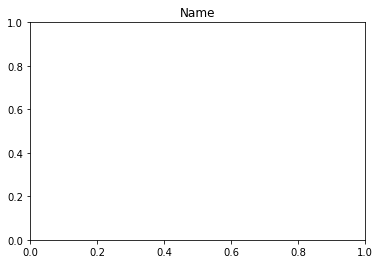

In [34]:

#set the data sets to compare
x_values = complete_df["Population"]
y_values = complete_df["Number of Reviews"]
#move the equations to where it can be seen
# regEQplotX = 
# regEQplotY = 
#label the axis
x_label = "Population"
y_label = "Number of Reviews"
#title
plt.title(f"Name")
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the figures folder
# plt.savefig("./figures/", bbox_inches='tight')
plt.show()

NameError: name 'regEQplotX' is not defined

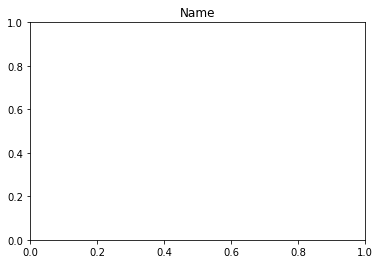

In [35]:


#set the data sets to compare
x_values = complete_df["Population"]
y_values = complete_df["Rating"]
#move the equations to where it can be seen
# regEQplotX = 
# regEQplotY = 
#label the axis
x_label = "Population"
y_label = "Rating"
#title
plt.title(f"Name")
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the figures folder
# plt.savefig("./figures/", bbox_inches='tight')
plt.show()

NameError: name 'regEQplotX' is not defined

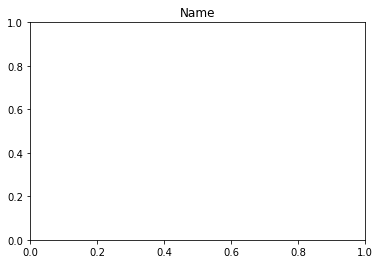

In [36]:

#set the data sets to compare
x_values = complete_df["Number of Reviews"]
y_values = complete_df["Price Level"]
#move the equations to where it can be seen
# regEQplotX = 
# regEQplotY = 
#label the axis
x_label = "Number of Reviews"
y_label = "Price Level"

#title
plt.title(f"Name")
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the figures folder
# plt.savefig("./figures/", bbox_inches='tight')
plt.show()

NameError: name 'regEQplotX' is not defined

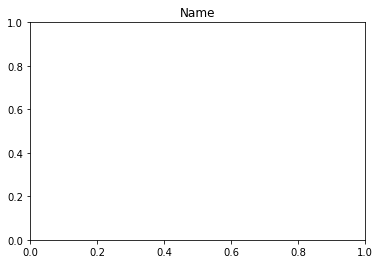

In [37]:
# "user_ratings_total":"Number of Reviews","price_level":"Price Level","latitude":"Lat_Restaurant",
#                                  "longitude":"Long_Restaurant","vicinity":"Vicinity"})

#set the data sets to compare
x_values = complete_df["Rating"]
y_values = complete_df["Price Level"]
#move the equations to where it can be seen
# regEQplotX = 
# regEQplotY = 
#label the axis
x_label = "Rating"
y_label = "Price Level"
#title
plt.title(f"Name")
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the figures folder
# plt.savefig("./figures/", bbox_inches='tight')
plt.show()

C:\Users\skdab\AppData\Local\Temp\ipykernel_3140\4276053673.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


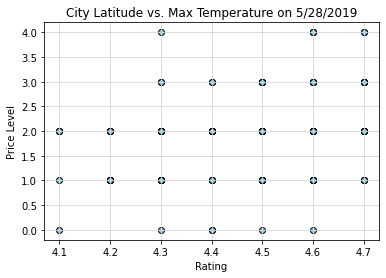

If the price level and rating is higher peoples assumption is that the food will be better


In [38]:
# how the scatter plot looks
plt.scatter(complete_df["Rating"],complete_df["Price Level"],edgecolors="black",facecolors="skyblue")
# title
plt.title("City Latitude vs. Max Temperature on 5/28/2019")
# x-axis
plt.xlabel("Rating")
# y-axis
plt.ylabel("Price Level")
# how the grid looks
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#save as a png to the figures folder
# plt.savefig("./figures/lat_vs_temp.png", bbox_inches='tight')
plt.show()
print("If the price level and rating is higher peoples assumption is that the food will be better")

when looking at the data we wanted to know what the most common review is given when someone is deciding a 4-5 review


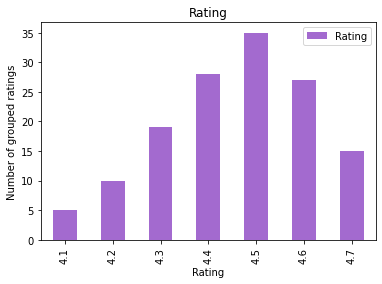

In [39]:
# First create a dataframe grouping by the 'Drug Regimen' column
r_bar=complete_df.groupby("Rating")
# Create a dataframe counting the number of data points for each Drug Regimen
r_count = pd.DataFrame(r_bar["Rating"].count())
# Create a bar chart based off of the group series from before and label the title
# used hexidecimal code for fun and you can pick way more specfic colors 
r_chart = r_count.plot(kind="bar", title="Rating", color="#A36ACF")
# # Set the X-label and Y-label
r_chart.set_xlabel("Rating")
# # unsure if its in sec/min/hrs
r_chart.set_ylabel("Number of grouped ratings")
print("when looking at the data we wanted to know what the most common review is given when someone is deciding a 4-5 review")

Text(0, 0.5, 'Number of grouped ratings')

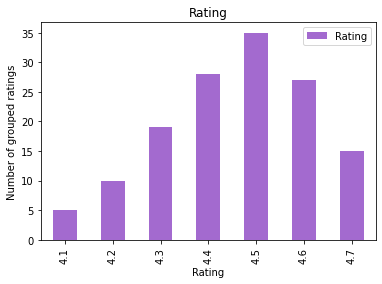

In [40]:
# First create a dataframe grouping by the 'Drug Regimen' column
r_bar=complete_df.groupby("Rating")
# Create a dataframe counting the number of data points for each Drug Regimen
r_count = pd.DataFrame(r_bar["Rating"].count())
# Create a bar chart based off of the group series from before and label the title
# used hexidecimal code for fun and you can pick way more specfic colors 
r_chart = r_count.plot(kind="bar", title="Rating", color="#A36ACF")
# # Set the X-label and Y-label
r_chart.set_xlabel("Rating")

r_chart.set_ylabel("Number of grouped ratings")

Text(0, 0.5, 'Ratings')

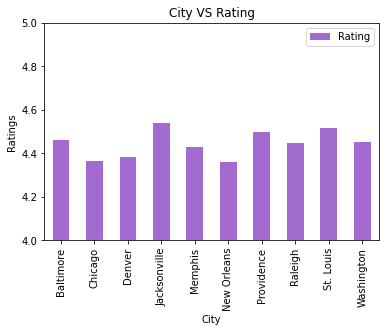

In [41]:
# First create a dataframe grouping by the 'Drug Regimen' column
r_bar=complete_df.groupby("City")
# Create a dataframe counting the number of data points for each Drug Regimen
r_count = pd.DataFrame(r_bar["Rating"].mean())
# Create a bar chart based off of the group series from before and label the title
# used hexidecimal code for fun and you can pick way more specfic colors 
r_chart = r_count.plot(kind="bar", title="City VS Rating", color="#A36ACF",)

# Configure x-tick rotation
# xticklabels = complete_df.index
# r_chart.set_xticklabels(xticklabels,labels=city, rotation=45, wrap=True)

# # Set the X-label and Y-label
r_chart.set_xlabel("City")
r_chart.set_ylim([4, 5])

r_chart.set_ylabel("Ratings")

In [43]:
# Create a map using state centroid coordinates to set markers
marker_locations = complete_df[['Latitude', 'Longitude']]

# Create a marker_layer using the poverty list to fill the info box
fig = gmaps.figure()
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [45]:
# Create a map using state centroid coordinates to set markers
marker2_locations = complete_df[['Lat_Restaurant', 'Long_Restaurant']]

# Create a marker_layer using the poverty list to fill the info box
fig = gmaps.figure()
markers = gmaps.marker_layer(marker2_locations)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [42]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
boxplot_list = []

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Generate a pie plot showing the distribution of female versus male mice using pyplot
r_pie = complete_df["Rating"].mean()

#Create variables to use in pie chart 
explode = (0.1,0)
labels = list(city.index)
colors =["#3AA4D6","#FF6E09"]


# #Create a pie chart
# plt.pie(mice_sex, 
#         explode=explode, 
#         labels=labels, 
#         colors = colors,
#         autopct="%.2f%%", 
#         shadow=True, 
#         startangle=280)

#  #label title and axis
# plt.title("Sex Distribution during Drug Testing",fontsize=16)
# plt.legend(labels, loc='upper right', frameon=True, bbox_to_anchor=(1, 1))
# plt.axis("equal")
# mice_sex

# # print and move img to the figures folder
# plt.savefig("./figures/pie_2.png", bbox_inches='tight')